# Computer Simulations

Computer simulations, also known as Monte Carlo simulations, are incredibly powerful. They allow us to compute the likely outcomes of situations or events when it would be difficult, expensive, or impossible to recreate the situations or events in the real world many times over.

As a simple example, if NASA were working on a new two-stage rocket, they would need to know, for a given launch site, where the first stage is likely to land once it detaches and falls to earth. That information would be crucial, and no launch would be allowed without it. Of course, equations using Newtonian physics and aerodynamics can be used to predict an expected spot for impact. But, obviously, the discarded stage won't hit in that exact spot every time. So, what we really want is a *distribution*, like a 2D histogram, of likely landing spots. In other words, a map of the danger zone. To construct a map of the danger zone, we could:

- Build a bunch of rockets and test-fire them into space, recording the impact coordinates of the fallen stage each time.

or

- Tinker with the constants in the equations (such as wind speed and direction at various altitudes) by hand, recording the impact coordinates predicted by the equations each time.

The second option would be incredibly tedious and would be subject to bias  (how would the exact wind directions be chosen?). The first option would expensive, time-consuming and, of course, incredibly dangerous. 

As a second example, consider forcasting the landfall of hurricanes. Here, it's obviously impossible to "test fire" a bunch of hurricanes and, even if we could, doing so would defeat the very purpose of forcasting the landfall! Very elaborate sets of equations can predict *a* landfall for a particular set of constants (ocean temperatures, prevailing winds, etc.) but, again, what we want is a *distribution* of likely locations for landfall – a map of the danger zone.

In each of these situations, the solution is to run the equations on a computer – that is, to do a simulations – many many times over and, each time, having the computer select probable values for the constants (air temperature etc.) *at random*. Having the values for the constants be set to new random values each time will make the final outcome – impact site, landfall location, etc. – also vary, and the final distribution of these outcomes will give us the information we want. 

Simulations are now ubiquitous in data science. They are, in fact, used in hurricane forcasting as well as in any other area in which people make predictions, such as sports, politics, and warfare (the first use of computer simulations was to help develop the first nuclear weapon). The key to doing computer simulations, however, is to be able to pump realistic *random* values into the equations on each simulation, so that the variability in these values plays out as realistic variability in the final outcome. So where do we get these random numbers?

## Pseudorandom Numbers

A computer is a deterministic machine meaning that, in any given state, it will always produce the same output for a given input. So how can a computer possibly produce random numbers? It can't. But it can produce ***pseudorandom numbers***, which are sequences of numbers that are random *for all practical intents and purposes*.

Pseudorandom numbers are so widely used and so good (that is, statistically indistinguishable from true random numbers) that most books and articles nowadays just refer to them as "random numbers". Similarly, the algorithms and programs used to generate them are called "random number generators" rather than "pseudorandom number generators".

The way computers make random numbers is conceptually quite simple. A starting value – a "seed" – is passed through an algorithm that produces a single output value, the first "random" number. This output is passed back though the algorithm to produce the second random number, and so on. The trick is to design an algorithm that makes it almost impossible to guess the input value from the output value. In other words, the numbers should appear to be unrelated or *independent*, and therefore random.

Here is a very simple algorithm for a (pseudo) random number generator. It takes three numbers:

- a number, *s*, the "seed"
- a number, *a*, called the "multiplier"
- and a number, *m*, called the "modulus"

It then computes the remainder – the modulus – of: $(seed * a) / m$

That equation yields our first random number. To get the second number, we feed the first output back into the equation in place of the seed. To get the third, we feed in the second and so on.

Here is code to implement the above algorithm – an actual (psuedo) random number generator!

In [1]:
s, a, m = 1, 10, 23  # seed, multiplier, modulus
ps_rands = []         # empty list to hold our numbers

for i in range(20) :
    if i > 0 :
        x = (ps_rands[i-1]*a)%m
        ps_rands.append(x)
    else :
        x = (s*a)%m
        ps_rands.append(x)
        
ps_rands

[10, 8, 11, 18, 19, 6, 14, 2, 20, 16, 22, 13, 15, 12, 5, 4, 17, 9, 21, 3]

Run the code and see if you can find a pattern in these numbers! If you can't, then they pass at least one informal test of randomness – the test of you!

---

Re-run the above code with various values for the seed. What happens?

---

Playing with the above code hopefully made you realize that this simple random number generator is actually not a good one. But it's also quite simple, so we got what we paid for!

A moment's thought should convince us that, if a random number generator outputs a number, say a 5, that it has already generated, then the sequence between the first and second 5 will just keep repeating. It has to, because the algorithm will always generate the same output for a given input! And sequences of numbers that repeat are not random! So one of the keys to good random number generators is to have them yield number sequences that go on for a very very very long while before they start repeating.

Modern random number generators are quite good; we don't need to worry about them, we just need to use them. Importantly, however, they are still algorithms, which means that given the same starting point – the seed – they will always produce the same sequence of numbers. This is a feature not a bug! It means that as long as we know our seed, we can always reproduce our analyses!

> Note: Modern computer operating systems are gathering true random numbers all the time, like the timing between your keyboard strokes, mouse movements, communications between the CPU and hard disk, and even the small fluctuations in noise around the computer! It uses these random numbers to encrypt your data and communications. 

> If you use numpy to generate random numbers without specifing a seed, numpy will dip into the random numbers used by your computer's OS. But then, of course, you won't know what your seed was and won't be able to reproduce your analysis!

## Preliminaries

In order to actually do simulations, we are going to be using the random number generating capabilities of numpy, so let's import it as usual. We're also going to want to make some histograms, so let's import Seaborn as well.

In [2]:
import numpy as np
import seaborn as sns

And run this command to make sure our plots show up.

In [3]:
%matplotlib inline    

## Using numpy's random number generator

The prefered method for getting random numbers using numpy is a two-step process. The process is:

1. Create a random number generator object at the start of a script or simulation
2. Use that random number generator to draw samples from you desired distribution

Here's how we create a random number generator with a seed of 42:

In [4]:
rng = np.random.default_rng(42) # seed with the answer to the ultimate question

We're allowed to name our generator whatever we want, but it's convention to name these generators "rng" unless there is a good reason to do otherwise. 

We can now use this generator throughout a given project or project phase. If we wanted a number from a normal distribution, for example, we would call the `rng.normal()` method.

---

In the cell below, call `rng.normal()` 10 or so times, and see what you get.

In [5]:
rng.normal()

0.30471707975443135

Is that about what you would expect? Why?

---

As always, we can use `rng.<tab>` to see what methods (statistical distributions in this case) are available. We can then use the help (e.g. `help(rng.normal`) to get help for that particular method.

---

In the cell below, get 100 samples from the Student's *t* distribution with 41 degrees of freedom, and plot (e.g. histogram) the resulting distribution.

Re-run the above a few times. Do the distributions look reasonable for a *t* distribution with *df* > 30?

---

## Simple simulations

The very idea of simulating something complicated can seem daunting if not impossible at first. How would we simulate something as complicated as a soccer game or traffic on a social media platform? Where would we even start? To get the idea of simulations, let's start by simulating a couple of very simple situations, coin flips and rolls of the dice.

### Coin Flips

A coin flip is probably the simplest physical situation we could simulate, so that's a great place to start. Any event that has to have one of two outcomes is known as a "Bernoulli trial" (after a famous mathematicion Daniel Bernoulli). This includes coin flips, answers to yes/no questions, consumer "to buy or not to buy" decisions, voting behavior, etc. 

Generally, we are interested in the sum of the results of many Bernoulli trials – for example, it is the total number of people that voted for canditate A (vs. candidate B) that determines the winner of an election.  A single set of Bernolli trials is called an "experiment". The outcome of such experiments, the sum of some number of Bernolli trials, has a *binomial* distribution. Thus, such simulations are done using the `rng.binomial()` method.

The binomial distribution has two parameters, 

- the number of trials (e.g. the number of people voting in an election), and 
- the probability of one of the outcomes occuring on a single trial.

(note that only one probability is needed, because the probability of the second is 1 minus the probability of the first) 

In terms of a coin, this translates to the number of times we flip a coin, and the probability that our coin comes up "heads" on any one trial.

#### A Fair Coin

First, let's reset our random number generator, `rng`, with a seed of 42 so everybody gets the same output.

---

Reset `rng` with a seed of 42 below:

In [6]:
rng = np.random.default_rng(42)

(We'll be resetting the generator back to 42 a lot – so, if you're feeling plucky, you could write yourself a little function with a short name to do this!)

In [7]:
def Reset(rng):
    rng = np.random.default_rng(42)
    return rng


---

And now let's simulate a fair coin or, more precisely, an experiment on a fair coin.

---

In the cell below, use `rng.binomial()` to do a simulation giving the number of heads resulting from a fair coin being flipped 10 times:

In [8]:
rng.binomial(10,.5)

6

Because we reset our random number generator, you should have gotten a 6. Run the above code a few more times, noting the numbers.

Now reset the generator to a seed of 42 again:

In [9]:
rng = Reset(rng)

And get a new sequence of number-of-heads for 10 flips of a fair coin to confirm you get the same sequence. 

In [10]:
rng.binomial(10,.5)

6

Now reset the seed to something else, and run a few more binomial experiments.

In [11]:
rng = np.random.default_rng(24)
rng.binomial(10,.5)

4

You should see a different sequence of numbers because you used a different seed.

---

##### *Simulating Many Experiments*

Simulating one experiment or event isn't very helpful in and of itself. Just because a single simulation said we'll get 6 out 10 heads doesn't mean we'll get that if we really do the coin flips!

The advantage of computer simulations is that they let us easily and rapidly compute the outcome of thousands or even millions of experiments in order to compute the *distribution* of likely outcomes – the "danger zone" in the rocket and hurricane examples.

You might be thinking "time for a `for` loop!" right now. Great! The `for` loop is used quite a bit in doing simulations! In this case, however, the `rng.binomial()` method takes an optional 3rd argument, which is the number of experiments to run. (The fact that it has this third argument is a clue that was written with simulations in mind!)

---

In the cell below, take advatage of of this third argument to simulate 100000 experiments, each consisting of 10 flips of a fair coin. Assign the output to the name `n_heads` (i.e. `n_heads = rng.binomial...`).

In [12]:
 # reset the genny
rng = Reset(rng)
    
 # define of trials, probability of a head on each trial
 # and number of experiments to simulate

In [13]:
n_heads =  rng.binomial(10,.5,10000)
# run the simulations using rng.binomial
n_heads

array([6, 5, 7, ..., 3, 4, 5])

---

In the cell below, make a histogram of the outcomes, `n_heads`, from our 100000 experiments. For best results, set the binwidth to 1 and make the x-axis go from 0 to 10. The "goto" `sns.displot()` should work well for this!

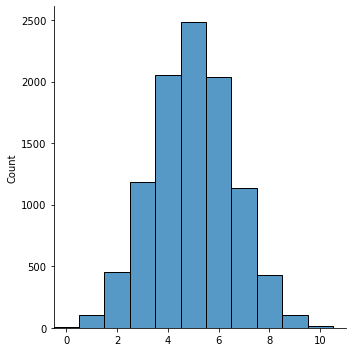

In [14]:

n_heads_plot = sns.displot(n_heads, binwidth = 1, binrange = (-0.5,10.5))
n_heads_plot.set(xlim = (-0.5,11))


Based upon this histogram, if somebody flipped a coin 10 times and came up with 2 heads, would you suspect that person of cheating? Why or why not?

What about 10 heads?

---

#### The Normal (Gaussian) Approximation

A binomial distribution can be approximated as a Gaussian with 

$\mu = n*p$ 

and 

$\sigma = \sqrt{n*p*(1-p)}$

---

Use the cell below to caluculate the mean and standard deviation of n_heads.

In [15]:
n = 10 
p = .5
mean_n_heads = n * p
mean_n_heads

5.0

Does the Gaussian approximation seem like a good one in this case?

---

#### An Unfair Coin

Perhaps surprisingly, it's almost impossible to make a biased coin because they are so thin relative to the size of their sides. However, we *can* easily simulate a biased coin so we would know what to look for if anyone did figure out how to make one.

---

Use the cell below to simulate the same experiment as above, but using a coin that lands on heads 75% of the time on average.

In [16]:
rigged =  rng.binomial(10,.75,10000)
rigged

array([7, 7, 9, ..., 6, 7, 9])

Now make a histogram of the outcomes (for the rest of the notebook, we'll just take it for granted that we'll be making histograms of our outputs).

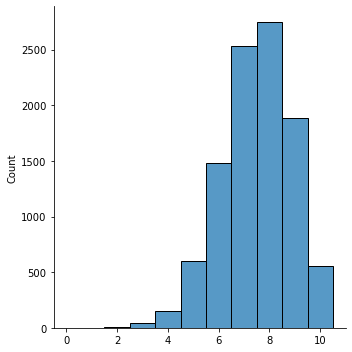

In [17]:
rigged_plot = sns.displot(rigged, binwidth = 1, binrange = (-0.5,10.5))
rigged_plot.set(xlim = (-0.5,11))

How did it change the distribution? Did the mean shift? Did the shape change?

---

## Simulating Elections

Armed with nothing more than our ability to model coinflips, we can also simulate a surprising amount of other things, such as elections. Literally anything that can be reduced to a series to two-alternitave choices can be simulated using the binomial distribution.

Let's say there is an upcoming election in which one million people were expected to vote, and candidate "A" is leading in the polls at 52% vs. 48%. Here is a simple simulation of this election – the number of votes for candidate A – assuming the polling is accurate.

In [18]:
rng.binomial(1000001, .52)

520017

---

Re-run the above simulation until you think you have a good idea of how often the underdog – poor candidate B – is likely to win.

Now, in the cell below, change the simulation so that there are only 11 voters – like perhaps a soccer team is chosing between two potential captains, and only the starters get to vote. Run the simulation until you get again get a feel for how often the underdog prevails.

In [19]:
rng.binomial(11,.52)

9

In the cell below, offer an explanation of why, with the same p = 0.52, the underdog prevails more in one case than another.

---

### Simulating election results based on a single poll

Above, we simulated one election at a time but, as with the coins, we really want to do many many experiments so that we can see the distribution of likely election outcomes.

#### *single poll, many elections*

Let's say we have a poll of 2000 likely voters for a mayoral race from a smallish city that shows candidate A up by 51% to 49%. We expect a voter turnout of 100,000 people. We want to simulate this election, and we'll do the simulation 20,000 times to generate the distribution of likely outcomes.

---

In the cell below, reset the random number generator to a seed of 42.

In [20]:
rng = Reset(rng)

Now define names (variables) for the probability corresponding to 51%, the expected number of voters, 100,000, and the number of simulations to run, 20,000.

In [21]:
election = rng.binomial(100000, .51, 20000)
election

array([51293, 51097, 51150, ..., 51087, 50968, 50880])

And run and plot the our simulations.

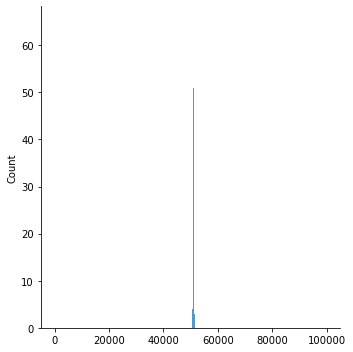

In [22]:
#elect_plot = sns.displot(election, binwidth = 1, binrange = (-0.5,10.5))

#elect_plot.set(xlim = (-0,5,11))


elect_plot = sns.displot(election, binwidth = 1, binrange = (-0.5,100000.5))
#elect_plot.set(xlim = (-0.5,11))
#elect_plot

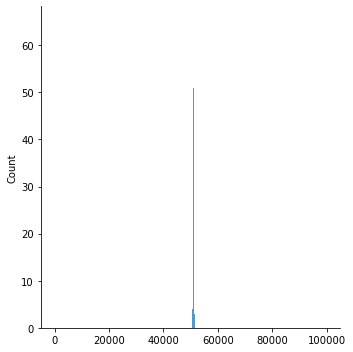

In [26]:
sns.displot(election, binwidth = 1, binrange = (-0.5,100000.5))

Around how many times did candidate B pull off the upset in our simulated elections?

---

#### Polls aren't perfect!

If we conduct a poll, we get an *estimate* of how many people in a sample (usually around 2000 people) will vote for each candidate. Polls are always reported with a "margin of error" that will be around 2% for a poll with n = 2000. For the above poll, a news blurb might read something like 

"Candidate A is leading Candidate B by 51% to 49%, but that's within the margin of error of 2%, so it's currently a statistical tie."

What is the margin of error? It is simply the 95% confidence interval on the percentage. What it's saying is that 1) the outcome of a poll is inherently variable and 2) the variability (which is approximately normally distributed) is such that +/- 2% encloses 95% of the distribution of possible poll outcomes. (If we remember our stats, we'll realize that the *standard error* of the poll is thus about 1%). 

The bottom line is that, if our above simulation was correct, candidate B should have won at least some of the time! The problem is that we were treating the *estimate* from the poll as a fixed constant, rather than as a variable that should fluxuate from experiment to experiment in our simulation.

How would we go about incorporating this variability into our simulations? Easy! Instead of considering the poll to be a fixed result, we'll include *a simulation of the poll* into each experiment, along with the simulation of the election.

#### *simulate poll -> simulate election*

From a coding standpoint, one obvious way to add polling variability to each experiment would be something like this:
```
for i in range(n_sims) :
    # compute a poll result using rng.binomial() where p = original poll estimate
    # compute an election result where p = simulated poll result
    # store election result
```

However, if we get help on the binomial via `help(rng.binomial`)...

In [24]:
help(rng.binomial)

Help on built-in function binomial:

binomial(...) method of numpy.random._generator.Generator instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``n`` and ``p`` are both scalars.
        Otherwise

We can see that either of the first two arguments can be vectors, allowing us to specify different probabilities (or sample sizes) for each experiment if we wish. So now we can conduct a new poll for each of our experiments with one call to `rng.binomial()`, and use the resulting poll numbers for our simulated elections. We'll simulate each poll assuming that the original poll result, p = 0.51, is our best guess as to the "true" underlying probability.

First, let's reset our generator back to 42.

In [25]:
rng = Reset(rng)

Let's set up our constants.

In [25]:
  # best guess of "true" probability
  # poll sample size
  # number of simulations to run

And conduct the polls.

In [26]:
 # get the polling results

Now will convert the poll results, which are in terms of total number of people saying they will vote for "A", to probabilities.

In [27]:
  # convert to probabilities

---

In the cell below, look at the first 10 or so probabilities we got.

---

Now that we have simulated polling data that reflect realistic poll-to-poll variability, we can simulate the elections.

(re) Set the number of expected voters.

In [28]:
 # medium city - expect around 100k voter turnout

And conduct and plot the results of the simulated elections! Remember to use your vector of poll probabilities for the probability argument!

Notice that Candidate B now pulls off the upset a substantial number of times! 

---

In the cell below, highlight the upsets by overlaying a histogram of B's wins on the main histogram. Pro tip: use `sns.histplot()` instead of `sns.displot()`, and set the binwidths the same for both.

And compute, in the cell below, the percentage of elections that came out for Candidate B.

---

### Simulating election results based on a multiple polls

Not all polls are created equally and, in high profile elections such as for US president, many polls by different organizations are conducted to see which way voters are leaning. So faced with, say, three polls with slightly different results, how would we go about forcasting the election?

Data scientists (such as the person behind the website [fivethirtyeight](https://fivethirtyeight.com/)) routinely "grade" polls. They do this in part by going back to all the recent elections and seeing how close to the election result each poll was. So what would we do if we had the following three polls?

- Poll X: 53% to 47%, grade = C
- Poll Y: 51% to 49%, grade = A
- Poll Z: 51.5% to 48.5%, grade = B

One thing we could do is simple take poll Y and ignore the other two. The problem with this is that it ignores the information provided by the other two polls – just because they have lower grade doesn't mean they are useless!

The solution is to compute a *weighted average* of the polls, giving each poll more or less influence on the final result based on its grade.

#### Weighted Averages

Weighted averages are often used to compute final grades in a class. So, for example, if a certain class has a grade breakdown of 50% final paper, 25% quizzes, and 25% attendence, and a certain students grades are 95, 85, and 100, respectively, then the final grade would be computed as 

In [29]:
0.5*95 + 0.25*85 + 0.25*100

93.75

Or, if we wanted to be a little more clear in the context of Python script:

In [30]:
weights = np.array([0.5, 0.25, 0.25])
grades = np.array([95, 85, 100])
final_grade = sum(weights * grades)
final_grade

93.75

We can even compute a weighted sum when the weights don't sum to 1.0. All we do is convert the weights so that they *do* sum to 1.0 by dividing by the sum of the weights. So, for example, if the above weights were given as 5, 2.5, and 2.5, we could do the following:

In [31]:
weights = np.array([5, 2.5, 2.5])
sum_of_w = np.sum(weights)
grades = np.array([95, 85, 100])
final_grade = np.sum(weights * grades)/sum_of_w
final_grade

93.75

(Notice that, in the first example, we did the same thing in our heads when we turned 50% into 0.5, etc.)

#### Weighted Polls by Grade

To simulate an election based on a weighted sum of polls, we need to convert the letter grades into numbers. The choice here is up to us and somewhat arbitrary. Let's start with the familiar gpa scale where an A is a 4, a B is a 3, etc.

Now that we've figured out our weights, we just need to repeat all the above steps, conducting each poll separately, weighting it, and then combining the results. 

Define the probalities, weights, and other things:

In [32]:
px, py, pz = 0.53, 0.51, 0.515        # actual poll results
wx, wy, wz = 2, 4, 3                  # letter grade weights
sum_of_w = wx + wy + wz               # sum of the weights
samp_sz = 2000                        # poll sample size
n_sims = 20000                        # number of simulations to run

Conduct the polls.

In [33]:
x_poll_results = rng.binomial(samp_sz, px, n_sims) # polling results for x
y_poll_results = rng.binomial(samp_sz, py, n_sims) # polling results for y
z_poll_results = rng.binomial(samp_sz, pz, n_sims) # polling results for z

Convert the poll totals to probabilities.

In [34]:
x_poll_probs = x_poll_results/samp_sz            # probabilities for x
y_poll_probs = y_poll_results/samp_sz            # probabilities for y
z_poll_probs = z_poll_results/samp_sz            # probabilities for z

In [35]:
n_voters = 100000 # medium city - expect around 100k voter turnout

Simulate sets of elections, separately for each poll.

In [36]:
elec_results_x = rng.binomial(n_voters, x_poll_probs, n_sims)
elec_results_y = rng.binomial(n_voters, y_poll_probs, n_sims)
elec_results_z = rng.binomial(n_voters, z_poll_probs, n_sims)

Compute the weighted average.

In [37]:
elec_results = (wx*elec_results_x + wy*elec_results_y + wz*elec_results_z) / sum_of_w

And plot the results!!!

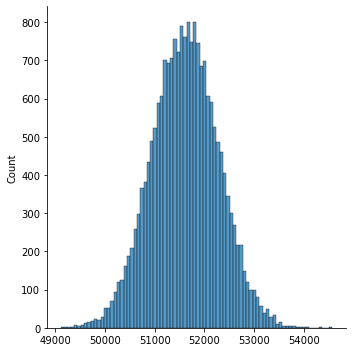

In [38]:
sns.displot(elec_results)

Does this look reasonable? Since we now have two polls indicating > 51% support for Candidate A, we'd expect the distribution to get pulled a little higher, and therefor Candidate B having fewer upsets...

---

Let's do two more quick reality checks. 

First, if we change the weights and/or the initial probabilities dramatically, we should be able to see a clear and sensible change in the outcome.

Go ahead and do this, and describe what you did and what happened as a result:

For a second reality check, consider that, if our simulation worked, then *the mean number of votes for Candidate A should be close to that predicted by the weighted average of the initial probabilities!

Use the cells below to make this comparison.

Mean number of votes for Candidate A:

Weighted sum of the initial probabilities:

Do they check out?

---